Building CNN

In [1]:




from tensorflow import keras
from keras.datasets import mnist



In [7]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
import matplotlib.pyplot as plt

In [11]:
import numpy as np


In [ ]:
import pandas as pa

<function matplotlib.pyplot.show(close=None, block=None)>

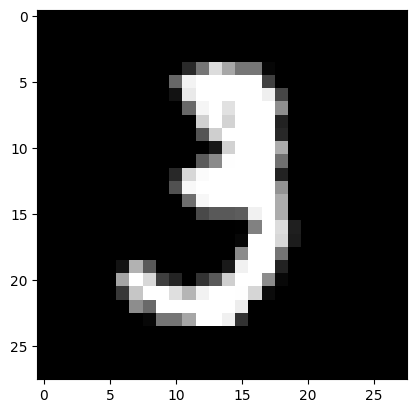

In [18]:
plt.imshow(x_train[10], cmap="gray")
plt.show

In [20]:
#prepraresing 
x_train =  x_train.reshape(-1, 28,28, 1).astype("float32")/256
x_test =  x_test.reshape(-1, 28,28, 1).astype("float32")/256

In [34]:
#model defination 
model = keras.Sequential()
#add the input shape, what the model expect to resive 
model.add(keras.layers.Input(shape=(28, 28, 1)))

#adding the first layer whitch is the conv layer
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), padding="valid", activation="relu", strides=(1, 1)))


#by this function it will make the matrix into the vector 
model.add(keras.layers.Flatten())



model.add(keras.layers.Dense(units=128 ,activation="relu"))
model.add(keras.layers.Dense(units=10 ,activation="softmax"))

model.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     2,769,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,770,634 (10.57 MB)

 Trainable params: 2,770,634 (10.57 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:

import tensorflow as tf

model.compile(
    optimizer= tf.optimizers.Adam(),
    loss=tf.losses.SparseCategoricalCrossentropy(),
    loss_weights=None,
    metrics=["accuracy"],
    weighted_metrics=None,
    run_eagerly=False,
    steps_per_execution=1,
    auto_scale_loss=True
)


In [44]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     2,769,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,770,634 (10.57 MB)

 Trainable params: 2,770,634 (10.57 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
hist  = model.fit(x_train, y_train, batch_size=120, epochs=10, verbose=1, validation_data=(x_test,y_test))

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.9855 - loss: 0.0481 - val_accuracy: 0.7030 - val_loss: 500.3505
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.9843 - loss: 0.0507 - val_accuracy: 0.7133 - val_loss: 479.7688
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.9867 - loss: 0.0445 - val_accuracy: 0.7175 - val_loss: 473.0224
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.9860 - loss: 0.0451 - val_accuracy: 0.7093 - val_loss: 489.6735
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9857 - loss: 0.0472 - val_accuracy: 0.7089 - val_loss: 498.9330
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.9876 - loss: 0.0417 - val_accuracy: 0.7124 - val_loss: 513.3105
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 23s 46ms/step - accuracy: 0.9866 - loss: 0.0420 - val_accuracy: 0.7017 - val_loss: 548.8796
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.9862 - l

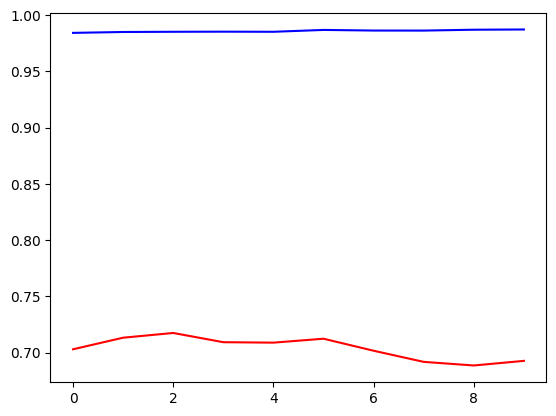

In [59]:
plt.plot(hist.history["accuracy"], color= "blue")
plt.plot(hist.history["val_accuracy"], color = "red")


In [61]:
hist2  = model.fit(x_train, y_train, batch_size=256, epochs=10, verbose=1, validation_data=(x_test,y_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - accuracy: 0.9895 - loss: 0.0358 - val_accuracy: 0.6932 - val_loss: 578.2490
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - accuracy: 0.9913 - loss: 0.0295 - val_accuracy: 0.6837 - val_loss: 621.8113
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - accuracy: 0.9911 - loss: 0.0319 - val_accuracy: 0.6826 - val_loss: 632.9869
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - accuracy: 0.9903 - loss: 0.0331 - val_accuracy: 0.6671 - val_loss: 683.4469
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - accuracy: 0.9911 - loss: 0.0294 - val_accuracy: 0.6754 - val_loss: 661.1666
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - accuracy: 0.9911 - loss: 0.0310 - val_accuracy: 0.6700 - val_loss: 678.5903
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - accuracy: 0.9912 - loss: 0.0298 - val_accuracy: 0.6598 - val_loss: 724.4600
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - accuracy: 0.9921 - l

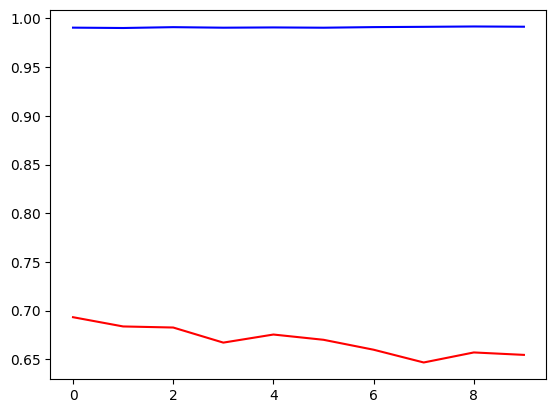

In [66]:
plt.plot(hist2.history["accuracy"], color= "blue")
plt.plot(hist2.history["val_accuracy"], color = "red")